In [5]:
""" This project demonstrates the power of information analysis and visualization.
By using very few tables we will gain significant insight into the population of Barcelona,
the Catalan capital.

The project uses raw data made available by Barcelona's municipal authorities,
which they collect at an unprecedented scale and detail-level."""

" This project demonstrates the power of information analysis and visualization.\nBy using very few tables we will gain significant insight into the population of Barcelona,\nthe Catalan capital.\n\nThe project uses raw data made available by Barcelona's municipal authorities,\nwhich they collect at an unprecedented scale and detail-level."

In [6]:
# Importing all the libraries used in the project
# You may need to install them if they are not already installed on your machine.

import pandas as pd
import numpy as np
import os as os
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import folium as folium
import json as json



In [7]:
# Let's read our first file called 'population.csv'. 
# This particular file was uploaded to Kaggle by Xavier, already translated into English, in part.
# The file shows the Barcelona population between 2013-2017 by districts and neighborhoods
# according to age and gender. Here is its head.
population=pd.read_csv(r'C:\Users\shmil\Documents\SQL Server Management Studio\Python\data\Barcelona_dataset\population.csv')
population.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [8]:
population.info()
# We can see that the table has 8 columns with 70080 rows. Also, it does not contain nulls and is has two datatypes,
# namely integers and strings.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70080 entries, 0 to 70079
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               70080 non-null  int64 
 1   District.Code      70080 non-null  int64 
 2   District.Name      70080 non-null  object
 3   Neighborhood.Code  70080 non-null  int64 
 4   Neighborhood.Name  70080 non-null  object
 5   Gender             70080 non-null  object
 6   Age                70080 non-null  object
 7   Number             70080 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 4.3+ MB


In [9]:
population.describe()
#The describe function provides aggragate information on the raw table columns that is mostly uninsightful, due to the table's arrangement.
# We do see that the table provides information about the years 2013-2017.

,Year,District.Code,Neighborhood.Code,Number
count,70080.000000,70080.000000,70080.000000,70080.000000
mean,2015.000000,6.246575,37.000000,114.844720
std,1.414224,2.788356,21.071458,96.540389
min,2013.000000,1.000000,1.000000,0.000000
25%,2014.000000,4.000000,19.000000,43.000000
50%,2015.000000,7.000000,37.000000,92.000000
75%,2016.000000,8.000000,55.000000,162.000000
max,2017.000000,10.000000,73.000000,777.000000


In [10]:
# By using the nunique function for the neighborhood and district columns we can see that 
# Barcelona is adinistratively divided into 10 districts and 73 neighborhouds

print(population['Neighborhood.Code'].nunique())
print(population['District.Code'].nunique())


73
10


In [11]:
# Let's see how many people lived in Barcelona in each one of the sampled year range (2013-2017), the lowest and higherst years
# and the standard deviation between them.

# Creating population totals
pop=population.groupby(['Year'])['Number'].sum().reset_index(name='Total Population')

#querying for the minimum, maximum and standard deviation figures
minpop=np.amin(pop['Total Population'])
maxpop=np.amax(pop['Total Population'])
stdpop=np.std(pop['Total Population'])

#showing the above
display(pop)
print('Minimum_Population=',minpop)
print('Maximum_Population=',maxpop)
print('Standard_deviation=',stdpop)

# We can see a rather steady population size with a slight annual increase of only around 10-20K, with a standard deviation
# of 6,461 people, which is only about 4%, over the years.

,Year,Total Population
0,2013,1611822
1,2014,1602386
2,2015,1604555
3,2016,1608746
4,2017,1620809


Minimum_Population= 1602386
Maximum_Population= 1620809
Standard_deviation= 6461.917319186311


In [12]:
# If we want to get population sums for a specific year directly, say 2017, the code would be

pop2017=population[population['Year']==2017]['Number'].sum()
print(pop2017)

# which would, again, sum up to 1,620,809 people for 2017.
# We will mostly investigate 2017 later on.

1620809


In [13]:
# Let's show this information on a graph.

# Selecting the style for our total population graph from the matplotlib library
# What styles are available

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

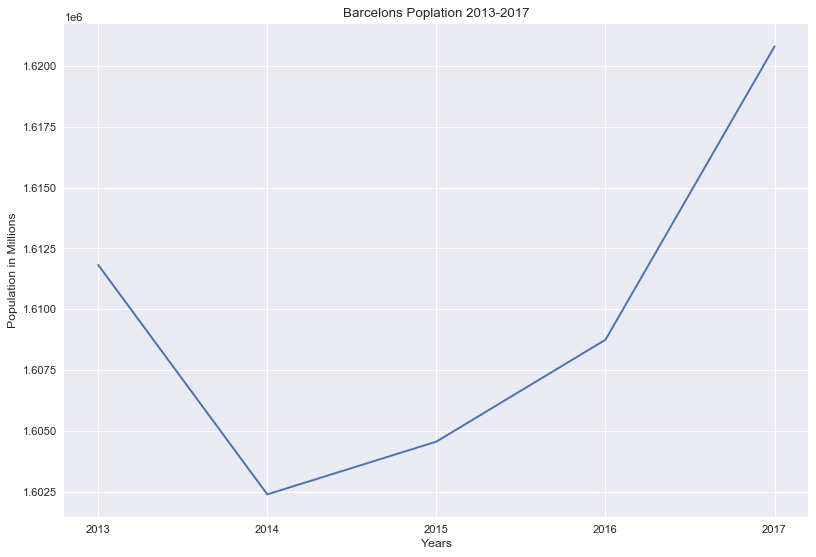

In [14]:
#Let's plot a graph using the matplotlib lirary and the 'seaborn-v0_8' style, for how many people lived in Barcelona between 2013-2017,

# Applying a style
plt.style.use('seaborn-v0_8') 

# Defining the graph dimensions
plt.figure(figsize=(12,8),dpi=80) 

# Defining the x label
plt.xlabel('Years') 

 # Defining the y label
plt.ylabel('Population in Millions')

# Defining the x ticks
plt.xticks([2013,2014,2015,2016,2017]) 

# Defining the title
plt.title('Barcelons Poplation 2013-2017')

# Plotting the population graph
plt.plot(population.groupby(['Year'])['Number'].sum()) 
plt.show()



<Axes: title={'center': 'Barcelons Poplation 2013-2017'}, xlabel='Years', ylabel='Population in Millions'>

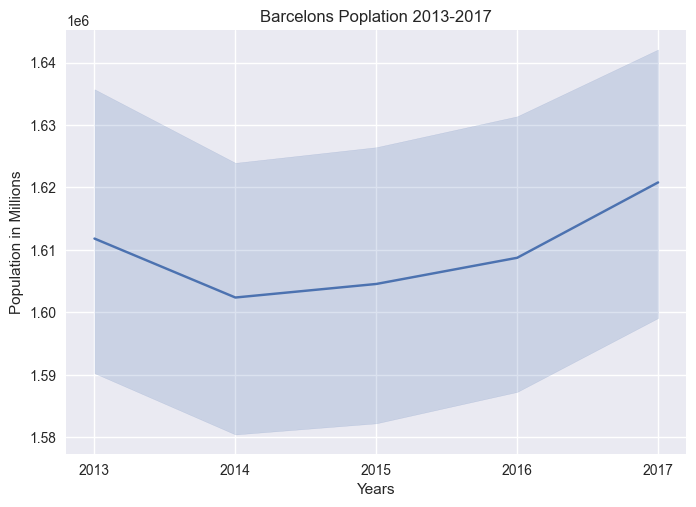

In [15]:
# We can see a slight decrease in the Barcelona population between 2013 and 2014, of about 10,000 people.
# Let's try to show that same data using the seaborn library instead of the matplotlib library.

# Defining everything again for the new graph type
plt.xlabel('Years')
plt.ylabel('Population in Millions')
plt.xticks([2013,2014,2015,2016,2017])
plt.title('Barcelons Poplation 2013-2017')
sb.lineplot(data=population, x="Year", y="Number",estimator="sum")

In [16]:
# We see that the population of Barcelona between 2013 and 2017 was around 1.6 million people, with an increase trend,
# beginning in 2014. This representation is also useful in showing that the population dip of 2013-2014
# was not a siginificant event.
# Let's see now what is the population distribution of city residents according to age groups.
# Firstly, we investigate the number of unique age groups in the population file.

print(population.Age.nunique())

# The result is that the smapling was divided into 20 age groups.


20


In [17]:
# Let's use a bar chart to see how many people are in each age group, out of the 1.6M total, for 2017.
# For that purpose, let's create the DF 'age2017', for the year 2017, group it by age and display it.
# This DF has two columns, Age Group and Age Group Total.

age2017=population[population.Year==2017][['Age','Number']].groupby(['Age'],sort=False).sum().reset_index(names=['Age Group']).rename(columns={'Number': 'Age Group Total'})
display(age2017)

# Note that we had to disable the default sorting index of the .groupby() function, because the 'Age Group' column data type is a string,
# and, pparently, the groupby function only considers the first character in a string to determine the series order.
# Given that, the intial result sorted the age group '5-9' incorrectly between the slices '45-49' and '50-54'.

# Also note, that we reset the index and renamed it 'Age Group' and renamed the Number column as Age Group Total, for a clearer presentation
# of the information.


,Age Group,Age Group Total
0,0-4,68402
1,5-9,69309
2,10-14,67575
3,15-19,65953
4,20-24,79062
5,25-29,106489
6,30-34,122353
7,35-39,134575
8,40-44,133557
9,45-49,118332


<Axes: title={'center': 'Barcelona Population According to Age Groups'}, xlabel='Age Groups', ylabel='Number of People'>

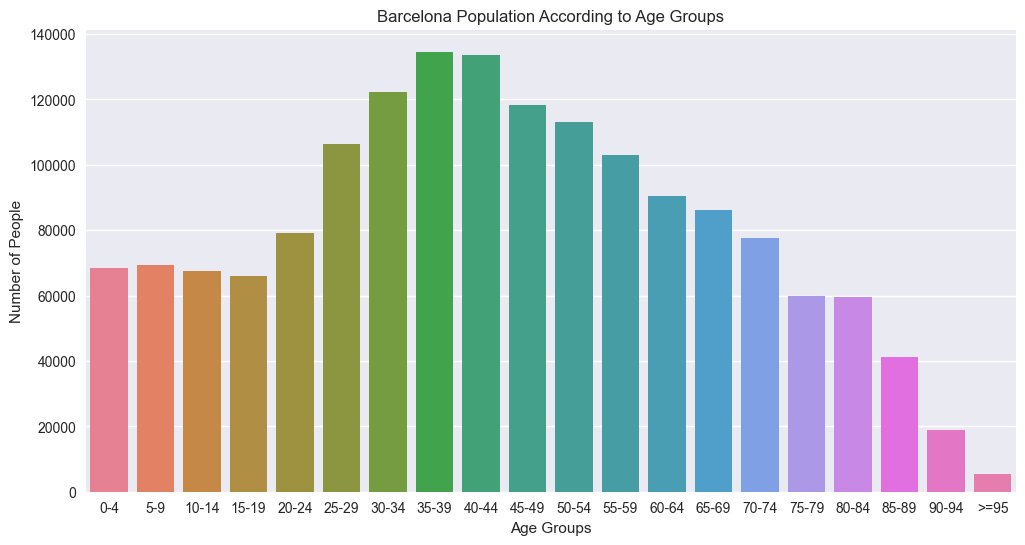

In [18]:
# We can already see that Barcelona is a younger city, in terms of its population. Only about 540k residents,
# which is only about 33% of the 1.6M or so in total, are over the age of 60.
# We will show this in a pie chart later on.
# The population backbone is between the ages 25 and 59,
# along with their 280k children, roughly stated.
# Those figures also imply an average of about 0.33 children per adult person in the city, under the premise
# that their parents are within the 25-59 age group range.
# The population DF does not hold data, however, about the number of children per housrehold or their distribution.

# Let's show this age distribution of residents on a bar graph using the DF we just created, to better see that
# most of Barcelona's population is of younger ages. As mentioned, for 2017.

# Setting the chart dimenions
plt.figure(figsize=(12,6)) 

# Setting up the x label
plt.xlabel('Age Groups') 

# Setting up the y label
plt.ylabel('Number of People') 

# Determining the title
plt.title('Barcelona Population According to Age Groups')

 #A bar chart with the Number of People as the y axis, colored according to age group
sb.barplot(data=age2017,x='Age Group', y='Age Group Total', estimator='sum',hue='Age Group')

In [19]:
# Let's improve on that presentation, to better show how relatively young the population is, by creating a new variable, called young_count, 
# which will count only the population that is younger than 55.
# Let's set up those two conditions.

 # 'age_group' is a boolean value. True if the age group is below 55
age_group=(population['Age']<'55-59')==True

# 'year' is a boolean value. True if the year is 2017
year=(population['Year']==2017)==True 

# The sum count of the people in Barcelona under 55 in 2017
young_count=population[age_group & year]['Number'].sum() 
print(young_count)

#The result is that 1,078,648 people in Barcelnoa are under the age of 55 in 2017. Let's show that using a pie chart.


1078648


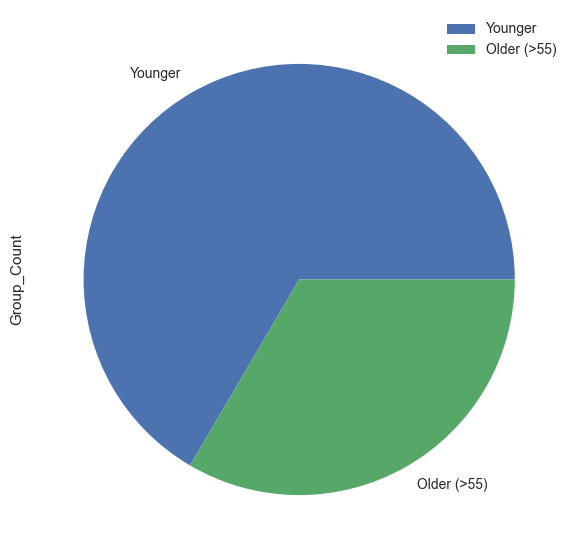

In [20]:
# Given how the pie chart works, we have to prepare a new DF for the presentation of those insights.
# We create a new DF that contains one series with two values, the younger (young_count), with 1078648 people, as we discovered,
# and the older, which has the balance of 1620809 minus 1078648 people in it, for 2017.

# Creating the dictionary with the appropriate indexes
df = pd.DataFrame({'Group_Count': [1078648, 542161]}, index=['Younger', 'Older (>55)']) 

 # Plotting the pie chart for the DF
plot = df.plot.pie(y='Group_Count', figsize=(7, 7))

# Now, it is very clear to see that Barcelona is a younger city, in terms of its population
# with all that this implies.

In [21]:
# Moving forward based upon that information, we can now ivestigate the distriburion of residents accros the city districts.
# Again, we reindexed and renamed the columns from the original data repositroy for clarity.

pop_in_districts2017=age2017=population[population.Year==2017][['District.Code','Number']].groupby(['District.Code'],sort=False).sum().reset_index().rename(columns={'Number': 'Number Total'})
display(pop_in_districts2017)


,District.Code,Number Total
0,1,101387
1,2,266416
2,3,181910
3,4,82033
4,5,149279
5,6,121347
6,7,168751
7,8,166579
8,9,147594
9,10,235513


In [22]:
# The population is fairly evenly distributed across the city districts, with the exception of district 4. Let's query for that district's name.

dist4=population[population['District.Code']==4]['District.Name'].drop_duplicates()
print(dist4)


# The result for that is that district 4 is Les Corts.

18    Les Corts
Name: District.Name, dtype: object


In [23]:
# Let's do the same population count for the neighbohoods, again, for 2017.

pop_in_neighborhoods2017=population[population.Year==2017][['Neighborhood.Code','Number']].groupby(['Neighborhood.Code'],sort=False).sum().reset_index().rename(columns={'Number': 'Number_Total'})
display(pop_in_neighborhoods2017)

# Let's export this DF to an Excel file for further use later on.
pop_in_neighborhoods2017.to_excel(r'C:\Users\shmil\Documents\SQL Server Management Studio\Python\data\Barcelona_dataset\pop_in_neighborhoods2017.xlsx')

#The DF 'pop_in_neighborhoods2017' shows the number of residents in each neighborhood.
pop_in_neighborhoods2017.info()

#Just to make sure we're still consistent, we sum it up to get 1620809, as expected.
pop_in_neighborhoods2017.Number_Total.sum()


,Neighborhood.Code,Number_Total
0,1,47608
1,2,16062
2,3,14996
3,4,22721
4,5,32016
...,...,...
68,69,13629
69,70,23009
70,71,20487
71,72,26146


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Neighborhood.Code  73 non-null     int64
 1   Number_Total       73 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


1620809

<Axes: xlabel='Neighborhood.Code', ylabel='Number of People'>

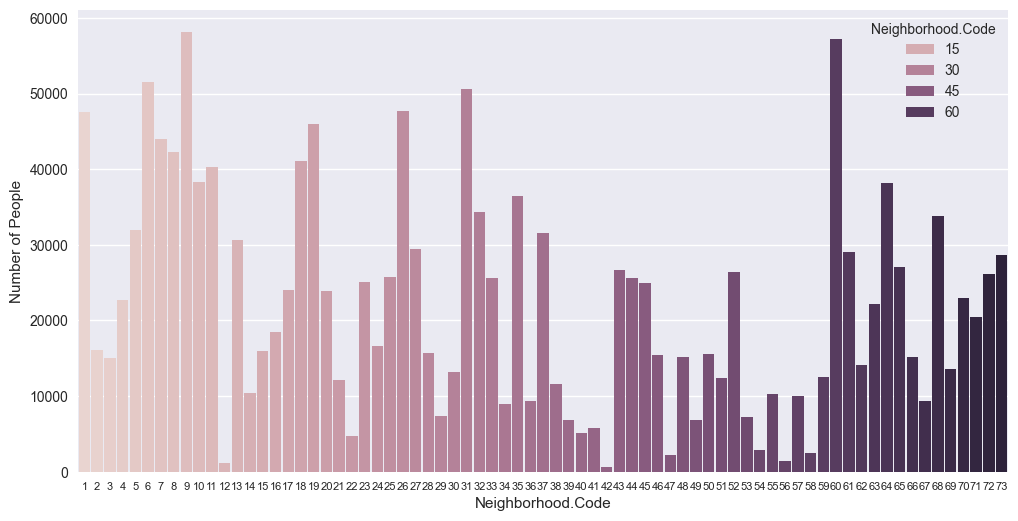

In [24]:
# Given that there are 73 neighborhoods in Barcelona, it would be very useful to provide a visualization for this information, so that we can
# assess it in its entirety.
# Let's try a bar graph.

# Setting the chart dimenions
plt.figure(figsize=(12,6)) 

# Setting the font size
plt.xticks(fontsize=8) 

 # Setting the x label
plt.xlabel('Neighborhood.Code')

# Setting the y label
plt.ylabel('Number of People') 

# A bar chart with the Number of People as the y axis, colored according to age group
sb.barplot(data=pop_in_neighborhoods2017,x='Neighborhood.Code', y='Number_Total', estimator='sum',hue='Neighborhood.Code',width=0.9) 

In [25]:
# This chart provides only a general impression of the population distribution accros neighborhoods.
# Let's investigate that distribution further, and find out how neighborhood populations
# are distributed around the neighborhood population mean.
# This will give us a better idea of the density uniformity of neighborhood populations.

# Calculating the total population and the population mean.
total_population = pop_in_neighborhoods2017['Number_Total'].sum()
mean_population = total_population / len(pop_in_neighborhoods2017)

# Calculating the standard deviation of each neighborhood population from the mean.
#
std_population = pop_in_neighborhoods2017['Number_Total'].std()

# Calculating the distance of each std obtained from 'mean_population' and appending the result to the DF pop_in_neighborhoods2017 as a column.
pop_in_neighborhoods2017['std_from_mean'] = pop_in_neighborhoods2017['Number_Total'] - mean_population

#Showing the modified table and the mean figure.
display(pop_in_neighborhoods2017)
print('the mean population per neighborhood is ',mean_population)



,Neighborhood.Code,Number_Total,std_from_mean
0,1,47608,25405.136986
1,2,16062,-6140.863014
2,3,14996,-7206.863014
3,4,22721,518.136986
4,5,32016,9813.136986
...,...,...,...
68,69,13629,-8573.863014
69,70,23009,806.136986
70,71,20487,-1715.863014
71,72,26146,3943.136986


the mean population per neighborhood is  22202.86301369863


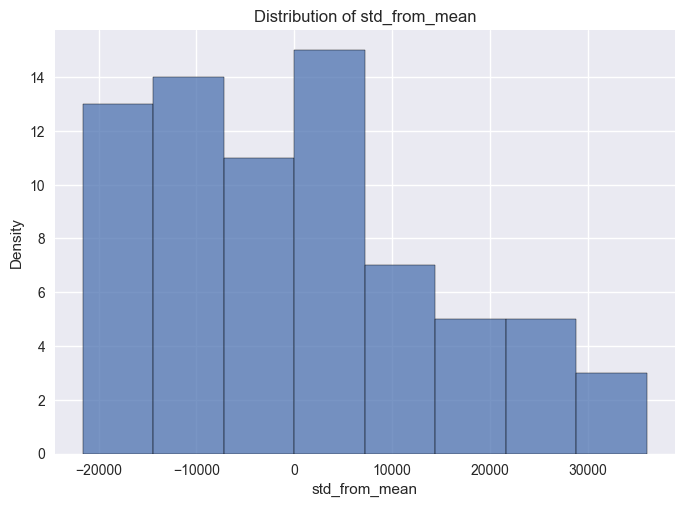

In [26]:
# Now we are ready to create a histogram chart to see the standrad deviation relative to the mean. Let's use the seaborn histplot function.

sb.histplot(data=pop_in_neighborhoods2017, x="std_from_mean")  

  # Set the x axis label
plt.xlabel("std_from_mean")

 # Set y axis label
plt.ylabel("Density") 

 # Add a title
plt.title("Distribution of std_from_mean") 
plt.show()



In [27]:
# We see that the denisty of neighborhoods is higher to the left of the mean. In other words, the distribution is 'left-skewed'.
# That might imply that most neighborhoods likely have populations below the mean neighborhood population.

# Let's use a KDEPlot graph to make that matter of'skewedness' cristal clear and easy to see.

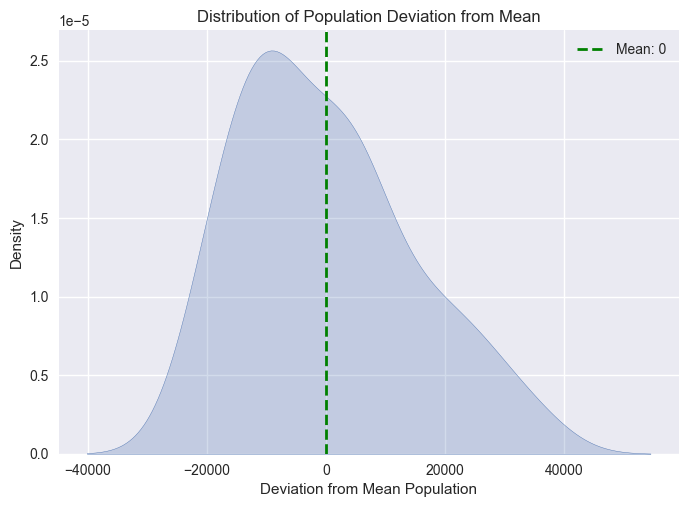

In [28]:

# Creating the plot window and the axis ax
fig, ax = plt.subplots()

# Plotting the graph
sb.kdeplot(

# Specifying the data file to be used
    data=pop_in_neighborhoods2017['std_from_mean'],

# Filling the area under the curve
    fill=True,  
    ax=ax
)

# Adding a vertical line for the mean (at x=0)
ax.axvline(x=0, color='green', linestyle='dashed', linewidth=2, label=f'Mean: 0')

# Setting axis labels and title
ax.set_xlabel('Deviation from Mean Population')
ax.set_ylabel('Density')
ax.set_title('Distribution of Population Deviation from Mean')

# Displaying the plot
plt.legend()
plt.show()

In [29]:
#The bell peak is clearly to the left of the mean, as expected.


# Let's move further by investigating which neighborhoods contain, cumulatively, 50% and 75% of the entire population of Barcelona.
# We do this be rearranging the neighborhood populations by size and summing them by size, if the threshhold has not yet been met.

# Defining population threshold variables and a new DF called 'sorted_df' to hold the sorted population values.
population_50_threshold = total_population * 0.5
population_75_threshold = total_population * 0.75

# Ordering the DF, and setting 'ascending' to 'False' to always count the largest neighborhoods first in the cumulative calculation
sorted_df = pop_in_neighborhoods2017.sort_values(by='Number_Total', ascending=False)

# Now we populate the respective series by iterrating over 'sorted_df' and summing the population values until the threshold is achieved, for both cases.

neighborhoods_50 = []
cumulative_population_50 = 0

for index, row in sorted_df.iterrows():
  cumulative_population_50 += row['Number_Total']
  neighborhoods_50.append(row['Neighborhood.Code'])
  if cumulative_population_50 >= population_50_threshold:
    break
  
neighborhoods_75 = []
cumulative_population_75 = 0
  
for index, row in sorted_df.iterrows():
  cumulative_population_75 += row['Number_Total']
  neighborhoods_75.append(row['Neighborhood.Code'])
  if cumulative_population_75 >= population_75_threshold:
    break

# Displaying how many neighborhoods are in each group.
print('The number of neighborhoods consiting 50% of the population =',len(neighborhoods_50), 'out of 73')
print('The number of neighborhoods consiting 75% of the population =',len(neighborhoods_75), 'out of 73')



The number of neighborhoods consiting 50% of the population = 20 out of 73
The number of neighborhoods consiting 75% of the population = 35 out of 73


In [30]:
# To summarize the last steps, we showed that the poplation in Barcelona is quite evenly distributed
#  among the districts, except for Les Courts. However, in terms of neighborhood population, the neighborhood population 
# is 'left-skewed'towards less densely populated neighborhoods, 
# whereby only 20 and 35 neighborhoods hold, in the cumulative, 50 and 75 percent,respectively, of Barcelona's population.

In [31]:
# Visualizing the neighborhood population density information on a 'live', interactive, Barcelona map will be the finalle of this project.
# For that purpose, we will use a pandas library called 'Folium'.
# We already imported the Folium library and its related modules at the top.

# The first step is to establish a base map of Barcelona using the coordinates of the city's center location.

# The coordinates for the center of Barcelona are
latitude = 41.3888
longitude = 2.1772

# Creating a base map centered on Barcelona with default zoom level
map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Displaying the map
map

In [32]:
# Having estabished the base map, we will now add a layer for the population density by neighborhood, using a colot pallete.

# To create this layer we will use two files. One is a GeoJason file that holds the geometry information for Barcelona neighborhood
# boundaries as a feature collection, which is a kind of nested disctionary structure.
# Let's load the geojson file and show its sturcture

geojson_data=json.load(open(r'C:\Users\shmil\Documents\SQL Server Management Studio\Python\data\Barcelona_dataset\JsonFiles\new_barris.geojson'))
geojson_data

{'type': 'FeatureCollection',
 'name': '0301040100_Barris_UNITATS_ADM',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[2.164714, 41.38593],
      [2.169358, 41.38554],
      [2.169769, 41.385574],
      [2.169963, 41.385667],
      [2.170081, 41.385485],
      [2.170517, 41.384814],
      [2.170509, 41.38482],
      [2.17066, 41.384596],
      [2.170961, 41.384149],
      [2.171722, 41.383],
      [2.17196, 41.38268],
      [2.17241, 41.382152],
      [2.173161, 41.381287],
      [2.173163, 41.381284],
      [2.1733, 41.381128],
      [2.173665, 41.380708],
      [2.17407, 41.380238],
      [2.174157, 41.380141],
      [2.174702, 41.379509],
      [2.175103, 41.379045],
      [2.175435, 41.378771],
      [2.175522, 41.378651],
      [2.175751, 41.378266],
      [2.175774, 41.378226],
      [2.176004, 41.37783],
      [2.176859, 41.376713],
      [2.177517, 41.376],
      [2.177479, 41.375965],
      [2.177419, 41.375885],
      [2.177385, 41.

In [33]:
# The property in the collection that we will use to connect the geometrty information in the GeoJson file 'geojson_data' 
# with the population data is called 'BARRI', neighborhoods.

# Now, Let's read the second file, for the population information that we need. It is a .csv file that we will call 'pop_barris'
# As you can see these files were obtained directly from Barcelona's data repository so they are still completely raw and in Spanish.

pop_barris=pd.read_csv(r'C:\Users\shmil\Documents\SQL Server Management Studio\Python\data\Barcelona_dataset\2017_pad_mdbas_sexe.csv')
pop_barris

,Data_Referencia,Codi_Districte,Nom_Districte,Barri,Nom_Barri,AEB,Seccio_Censal,Valor,SEXE
0,01/01/2017,1,Ciutat Vella,1,el Raval,1,1001,566,1
1,01/01/2017,1,Ciutat Vella,1,el Raval,1,1001,699,2
2,01/01/2017,1,Ciutat Vella,1,el Raval,1,1002,689,1
3,01/01/2017,1,Ciutat Vella,1,el Raval,1,1002,906,2
4,01/01/2017,1,Ciutat Vella,1,el Raval,2,1003,1560,1
...,...,...,...,...,...,...,...,...,...
2131,01/01/2017,10,Sant Martí,73,la Verneda i la Pau,233,10141,519,2
2132,01/01/2017,10,Sant Martí,73,la Verneda i la Pau,233,10142,850,1
2133,01/01/2017,10,Sant Martí,73,la Verneda i la Pau,233,10142,762,2
2134,01/01/2017,10,Sant Martí,73,la Verneda i la Pau,233,10143,920,1


In [34]:
# In pop_barris, the connecting columm, as mentioned, is 'Barri', and the population information, grouped in 'pop_barris' by districts,
# is called 'Valor', or value.

# The list index for 'Barri' in both files must be identical in values and total length for this to work.

# As recalled, 'pop_barris' is grouped by districts. So, to achieve the correct corresponding index, let's create a new DF, for easy use, 
# leaving unused fields out. The new DF will only hold the 'Barri' column as the index and the 'Valor' column,
# re-grouped,however, this time, by neighborhood, with 'Valor' summed.
# We again obtain the population per neighborhood.

pop_barris_barri=pop_barris.groupby('Barri')['Valor'].sum()
pop_barris_barri


Barri
1     47901
2     16240
3     15101
4     22923
5     32137
      ...  
69    13670
70    23063
71    20519
72    26187
73    28725
Name: Valor, Length: 73, dtype: int64

In [35]:
# Now we have both files in order.
# Let's use the Folium Choropleth class to add the population density overlay on the map. 
# The darker the color the denser the population is.

# As mentioned, we already imported all the libraries and modules we need for this.

# Setting up the overlay class
folium.Choropleth(

# Adding the GeoJson file containing the geometry information for barri boundaries (coordinates)
    geo_data=geojson_data,

# Selecting the Folium class type
    name='Choropleth',

# Adding the 'Barri' and 'Valor' information from 'pop_barris_barri'
    data=pop_barris_barri, columns=['Barri', 'Valor'],

# Defining 'Barri' from 'geojson_data' as the key connecting both databases
    key_on="feature.properties.BARRI",

# Setting up the overlay color scheme
    fill_color="YlGnBu",

# Determining the opacity of overlay lines and fill colors
    fill_opacity=0.6,
    line_opacity=0.5,

# Creating a legend according to the color scheme, called 'Population Density'. 
# The darker the color the denser the population is.
    legend_name="Population Density"
).add_to(map)

# Adding the overlay on the map
folium.LayerControl().add_to(map)

# Displaying the map
map

# Saving the image for display on github
map.save(r"C:\Users\shmil\Documents\SQL Server Management Studio\DA Course HW\Github\map_image.png")



In [36]:
# Isn't that just beautiful?
# You can zoom in and out and drag the map to browse it. It's really cool.

#Also, it is a wonderful visualization of the 'left-skewed' neighborhood popultion density towards less-populated neighborhoods, whereby
# a bunch of much more densely populated neighborhoods push the mean upwards.

# That's the end of the project. 
# I believe that even with this small project, through my analysis and visulatization, we now know much more about Barcelona and its population.

# Thank you for taking the time to review my project!